# Метод прогонки: XI.9.5

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def alphaN(alpha, a, b, c):
    return c/(b - alpha * a)

def betaN(alpha, beta, phi, a, b):
    return (a * beta - phi) / (b - alpha * a)

def gammaN(alpha, gamma, a, b):
    return (a * gamma) / (b - alpha * a)

def yNext(alpha, beta, gamma, y, yN):
    return alpha * y + beta + gamma * yN
    
def setMatrixBase(N, h):
    A = np.zeros(N)
    B = np.zeros(N)
    C = np.zeros(N)
    r = np.zeros(N)

    h2 = h**2

    for n in range(0, N):
        A[n] = 1.0
        B[n] = 2.0 + (10 + np.sin(2 * np.pi * (n * h))) * h2  
        C[n] = 1.0
        r[n] = np.cos(n * h * 2 * np.pi) * h2

    return A, B, C, r


In [8]:
def progon(A, B, C, r, N):
    alphas = np.zeros(N)
    betas  = np.zeros(N)
    gammas = np.zeros(N)

    alphas[1] =  C[0] / B[0]
    betas[1]  = -r[0] / B[0]
    gammas[1] =  A[0] / B[0]

    for kk in range(1, N - 1):
        alphas[kk + 1] = alphaN(alphas[kk], A[kk], B[kk], C[kk])
        betas[kk + 1]  = betaN(alphas[kk], betas[kk], r[kk], A[kk], B[kk])
        gammas[kk + 1] = gammaN(alphas[kk], gammas[kk], A[kk], B[kk])

    mus_array = np.zeros(N)
    nus_array = np.zeros(N)

    mus_array[N-1] = -C[N-1] / (A[N-1] * (alphas[N-1] + gammas[N-1]) - B[N-1])
    nus_array[N-1] = (r[N-1] - A[N-1] * betas[N - 1]) / (A[N-1] * (alphas[N - 1] + gammas[N - 1]) - B[N-1])

    for kk in range(N - 2, -1, -1):
        mus_array[kk] = alphas[kk + 1] * mus_array[kk + 1] + gammas[kk + 1] * mus_array[N - 1]
        nus_array[kk] = alphas[kk + 1] * nus_array[kk + 1] + gammas[kk + 1] * nus_array[N - 1] + betas[kk + 1]

    y0 = nus_array[0] / (1 - mus_array[0])
    yN = mus_array[N-1] * y0 + nus_array[N-1]

    ys = np.zeros(N)
    ys[0] = y0
    ys[N-1] = yN

    for kk in range(N - 1, 0, -1):
        ys[kk - 1] = yNext(alphas[kk], betas[kk], gammas[kk], ys[kk], yN)

    return ys

In [9]:
def main():
    h = 0.005
    N = int(1.0/h)
    assert (N * h == 1)

    A, B, C, r = setMatrixBase(N, h)

    ys = progon(A, B, C, r, N)

    xs = np.arange(0, 1.0, h)

    plt.grid()
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Final solution without periods")
    plt.plot(xs, ys)
    plt.show()

    repetitions = 5

    plt.grid()
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(f"Final solution with {repetitions} periods")
    plt.plot(np.arange(0, 1.0 * repetitions, h), np.tile(ys, repetitions))
    plt.show()

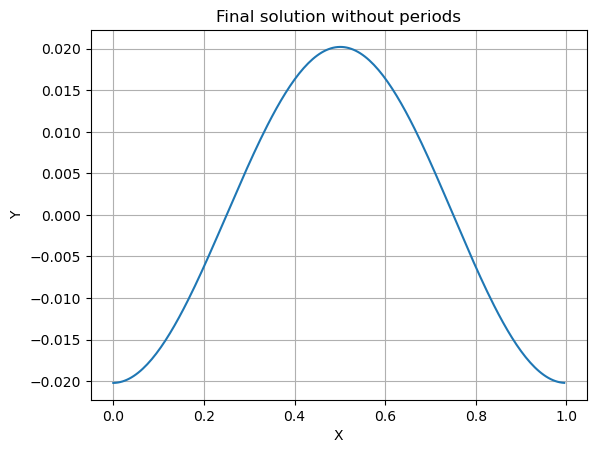

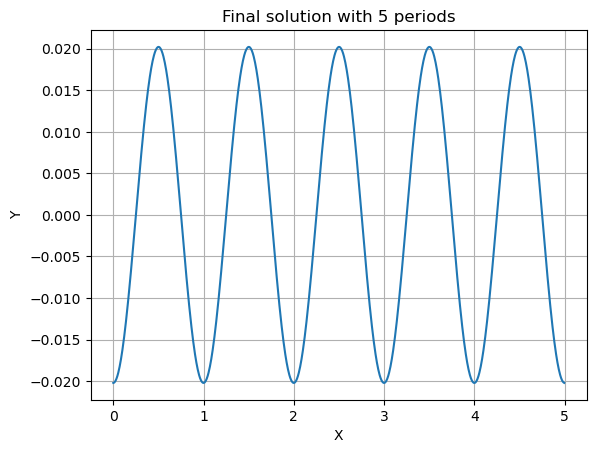

In [10]:
main()